# Froid

In [183]:
import numpy as np
import pandas as pd
import scipy as sc
import matplotlib as mpl
import matplotlib.pyplot as plt
from uncertainties import unumpy as unp
from uncertainties import ufloat, umath
from math import ceil
from itertools import product
from options import *
from constants import *

nom_vals = unp.nominal_values
std_devs = unp.std_devs

mpl.rcParams.update(rcParams)

In [184]:
def load(filename: str):
    return pd.read_csv(filename, sep='\t')

In [185]:
froid1_data = load('../data/froid1.xls')
froid2_data = load('../data/froid2.xls')
chaud3_data = load('../data/chaud3.xls')
chaud4_data = load('../data/chaud4.xls')
# tiede5_data = load('../data/tiede5.xls')
# tiede6_data = load('../data/tiede6.xls')

In [186]:
def dothefit(x: np.ndarray, y: np.ndarray, start: int | None = None, end: int | None = None) -> np.ndarray:
    if start is None:
        start = 0
    if end is None:
        end = len(x) - 1
    
    coefs, cov = np.polyfit(nom_vals(x[start:end]), nom_vals(y[start:end]), 1, cov=True)
    coefserr = unp.uarray(coefs, np.sqrt(np.diag(cov)))

    return coefserr

In [187]:
def convert(data: pd.DataFrame, dim: dimensions) -> tuple[np.ndarray, np.ndarray]:
    eps = (data['Deformation [V]'] - data['Deformation [V]'][0]) * 5 / dim.longueur
    sigma = data['Force [V]'] * 1000 / 0.934 / (dim.largeur * dim.epaisseur * 1e-6)
    return eps, sigma

In [194]:
def find_young_and_plot(data, dims, start=None, end=None):
    if start is None:
        start = 0
    if end is None:
        end = len(data) - 1
    eps, sigma = convert(data, froid1)
    coefserr = dothefit(eps, sigma, start, end)
    print(f"E = {coefserr[0]:.1uP}")

    fitfunc = np.poly1d(nom_vals(coefserr))
    x = np.linspace(eps[start].n, eps[end].n)
    plt.plot(x, fitfunc(x), 'k--')

    plt.scatter(nom_vals(eps), nom_vals(sigma), marker='+', s=6)
    plt.xlabel(r'$\varepsilon$')
    plt.ylabel(r'$\sigma$ [N/m²]')
    plt.grid()

E = (6.57±0.04)×10¹⁰


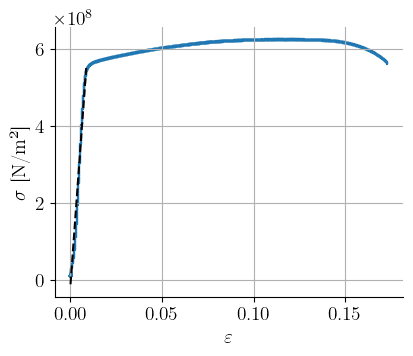

In [189]:
%matplotlib inline
find_young_and_plot(froid1_data, froid1, 50, 800)

E = (6.74±0.05)×10¹⁰


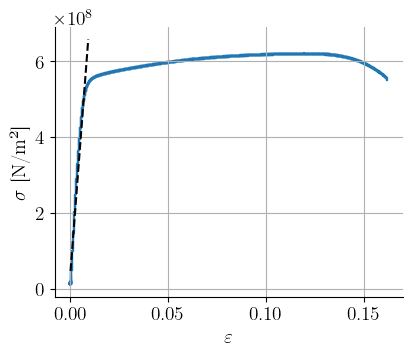

In [190]:
find_young_and_plot(froid2_data, froid2, 50, 800)

E = (1.4±0.1)×10¹¹


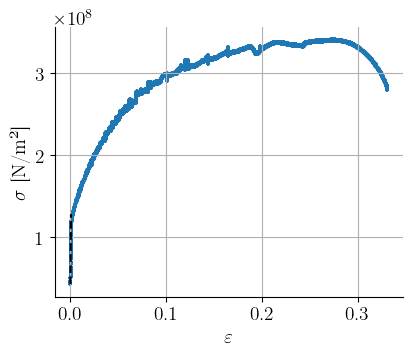

In [198]:
%matplotlib inline
find_young_and_plot(chaud3_data, chaud3, 0, 50)

In [197]:
%matplotlib qt
find_young_and_plot(chaud4_data, chaud4, 170, 200)

E = (-2.3±0.3)×10¹¹
